# Analyza liekov podla skupiny ATC1 
## Otazky:
* Ktore skupiny liekov sa najviac spotrebuvaju ?
* Ako sa meni spotreba podla jednotlivych kategorii ?
* Ako to suvysi s pandemiou ?

In [14]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%run tables.py

In [79]:
detailed_tables = {}
for year in range(2015,2020):
    detailed_tables[year] = import_table('detailed',year).groupby('ATC1_popis').sum().sort_values(by='Počet balení',ascending=False)
    del detailed_tables[year]['ROK SPRAC']
    detailed_tables[year]['CENA'] =  detailed_tables[year]['Úhrada_SPOLU'] / detailed_tables[year]['Počet balení']
display(2019)
display(detailed_tables[2019].head())

2019

,Počet balení,Úhrada_ZP,Úhrada_PAC,Úhrada_SPOLU,CENA
ATC1_popis,,,,,
Kardiovaskulárny systém,3.009478e+07,1.366732e+08,73614509.50,2.102878e+08,6.987516
Nervový systém,2.528963e+07,1.029034e+08,58926530.22,1.618300e+08,6.399066
Tráviaci trakt a metabolizmus,2.003817e+07,1.562717e+08,76696058.77,2.329677e+08,11.626196
Respiračný systém,1.780014e+07,5.968704e+07,73856187.61,1.335432e+08,7.502369
Krv a krvotvorné orgány,1.367591e+07,2.253825e+08,13245441.18,2.386280e+08,17.448775


In [80]:
temp = import_table('detailed',2020) 
detailed_tables[2020] = temp['Q1'].groupby('ATC1_popis').sum().sort_index()
#display(temp['Q1'].groupby('ATC1_popis').sum().sort_index().shape)
for i in range(2,4):
    #display(temp[f'Q{i}'].groupby('ATC1_popis').sum().sort_index().shape)
    detailed_tables[2020] =  detailed_tables[2020] + temp[f'Q{i}'].groupby('ATC1_popis').sum().sort_index()
del detailed_tables[2020]['ROK SPRAC']
detailed_tables[2020] = detailed_tables[2020].sort_values(by='Počet balení',ascending=False)
detailed_tables[2020]['Počet balení_estimated'] = detailed_tables[2020]['Počet balení']/75 * 100
display(detailed_tables[2020].head())

,Počet balení,Počet balení_estimated
ATC1_popis,,
Kardiovaskulárny systém,2.243462e+07,2.991283e+07
Nervový systém,1.941885e+07,2.589180e+07
Tráviaci trakt a metabolizmus,1.430232e+07,1.906976e+07
Respiračný systém,1.142406e+07,1.523209e+07
Rôzne,9.502924e+06,1.267056e+07


In [110]:
temp = {}
temp['ATC1_popis'] = []
for i in detailed_tables[2020].index:
    temp['ATC1_popis'] += [i]
    for j in range(2015,2021):
        if j not in temp:
            temp[j] = []
        if j ==2019 and i == '(prázdne)':
            temp[j] += [detailed_tables[j].loc['(prazdne)','Počet balení']]
        elif j == 2020:
            temp[j] += [detailed_tables[j].loc[i,'Počet balení_estimated']]
        else:
            temp[j] += [detailed_tables[j].loc[i,'Počet balení']]
detailed_tables['all'] =  pd.DataFrame(temp).set_index('ATC1_popis')
detailed_tables['all'] = detailed_tables['all'].rename(index={'Systémové hormonálne prípravky okrem pohlavných hormónov':'Hormonálne prípravky okrem pohlavných'})
display(detailed_tables['all'].head())

,2015,2016,2017,2018,2019,2020
ATC1_popis,,,,,,
Kardiovaskulárny systém,3.187437e+07,3.146644e+07,3.072354e+07,3.032789e+07,3.009478e+07,2.991283e+07
Nervový systém,2.565168e+07,2.565618e+07,2.507354e+07,2.561874e+07,2.528963e+07,2.589180e+07
Tráviaci trakt a metabolizmus,1.918639e+07,1.965176e+07,1.968389e+07,1.992195e+07,2.003817e+07,1.906976e+07
Respiračný systém,1.703448e+07,1.678311e+07,1.720150e+07,1.771564e+07,1.780014e+07,1.523209e+07
Rôzne,1.409553e+07,1.374374e+07,1.303431e+07,1.280559e+07,1.165731e+07,1.267056e+07


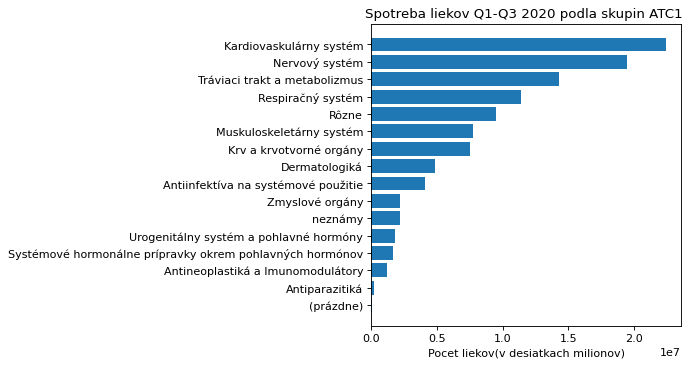

In [134]:
plt.figure(figsize=(5, 5), dpi=80)
plt.barh(y=detailed_tables[2020].sort_values(by='Počet balení',ascending=True).index,
width=detailed_tables[2020].sort_values(by='Počet balení',ascending=True)['Počet balení'])
plt.xlabel('Pocet liekov(v desiatkach milionov)')
plt.title('Spotreba liekov Q1-Q3 2020 podla skupin ATC1 ')
plt.show()

## Pozorovanie
Na grafe je vidiet ze v roku 2020 bolo najviac spotrebovanych liekov v oblastiach:
* Kardiovaskulárny systém
* Nervový systém
* Tráviaci trakt a metabolizmus
* Respiračný systém
* Rôzne
* Muskuloskeletárny systém

Dalej chceme zistit ci rastie alebo klesa spotreba liekov v tych oblastiach

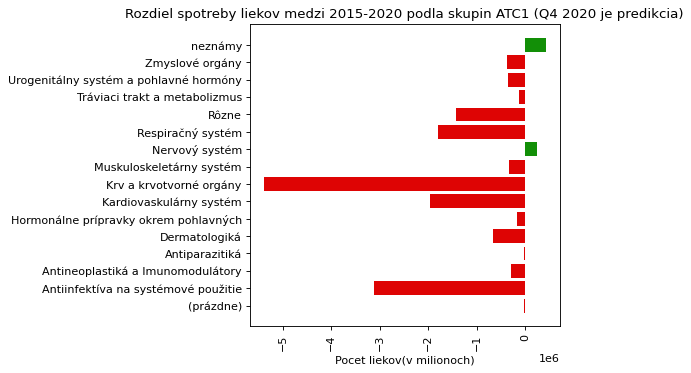

In [129]:
color = ['#de0404' if diff < 0 else '#128f07' for diff in detailed_tables['all'][2020].sort_index() - detailed_tables['all'][2015].sort_index()]

plt.figure(figsize=(5, 5), dpi=80)
plt.barh(width=detailed_tables['all'][2020].sort_index() - detailed_tables['all'][2015].sort_index() , y=detailed_tables['all'].sort_index().index,color=color)
plt.xticks(rotation=90)
plt.xlabel('Pocet liekov(v milionoch)')
plt.title('Rozdiel spotreby liekov medzi 2015-2020 podla skupin ATC1 (Q4 2020 je predikcia)')
plt.show()

## Pozorovanie
Kazda kategoria zazila pokles okrem skupiny Nervovy system a zvysili sa nezname lieky.
* Kedze aj priemerna dlzka zivota sa zvysuje takyto vysledok sme aj cakali. 
* Ocakavali sme zvysenie liekov skupiny respiracny system kvoli pandemie Covid-19, tento udaj vsak moze byt skresleny kedze pandemia bola najhorsia v 4 stvrtroku ktory len predikujeme.
* Poznamky: 
    * pozriet ake lieky su v skupine Nervovy system: ak antidepresiva tak tm moze byt suvis s pandemiou a izolovanim ludi
    * popripade pozriet ake lieky maju neznamu skupinu ATC1 a najst dovod preco sa zvysila ich spotreba
